# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice.
num_mice = len(combined_data_df["Mouse ID"].unique())
num_mice

249

In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupe_mice = combined_data_df.groupby(["Mouse ID", "Timepoint"]).size()
dupe_mouse_ids = dupe_mice[dupe_mice > 1].reset_index()["Mouse ID"].unique()
dupe_mouse_ids

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = combined_data_df[combined_data_df["Mouse ID"].isin(dupe_mouse_ids)]
dupe_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_df =  combined_data_df[combined_data_df.isin(dupe_mouse_data) == False].dropna()
cleaned_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.0,0.0,Capomulin,Female,9.0,22.0
1,f932,0.0,45.0,0.0,Ketapril,Male,15.0,29.0
2,g107,0.0,45.0,0.0,Ketapril,Female,2.0,29.0
3,a457,0.0,45.0,0.0,Ketapril,Female,11.0,30.0
4,c819,0.0,45.0,0.0,Ketapril,Male,21.0,25.0


In [34]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(cleaned_mouse_data_df["Mouse ID"].unique())
new_num_mice

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugreg_tumvol_mean = cleaned_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
#drugreg_tumvol_mean
drugreg_tumvol_median = cleaned_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
#drugreg_tumvol_median
drugreg_tumvol_var = cleaned_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
#drugreg_tumvol_var
drugreg_tumvol_stdev = cleaned_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
#drugreg_tumvol_stdev
drugreg_tumvol_sem = cleaned_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
#drugreg_tumvol_sem
drugreg_tumvol_summary = pd.DataFrame({"Mean Tumor Volume": drugreg_tumvol_mean,
                                       "Median Tumor Volume": drugreg_tumvol_median,
                                       "Tumor Volume Variance": drugreg_tumvol_var,
                                       "Tumor Volume Std. Dev.": drugreg_tumvol_stdev,
                                       "Tumor Volume Std. Err.": drugreg_tumvol_sem})
drugreg_tumvol_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#pandas.pydata.org for the agg() formula
drugreg_tumvol_agg_summary = cleaned_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median",
                                                                                                "var", "std", "sem"])
drugreg_tumvol_agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

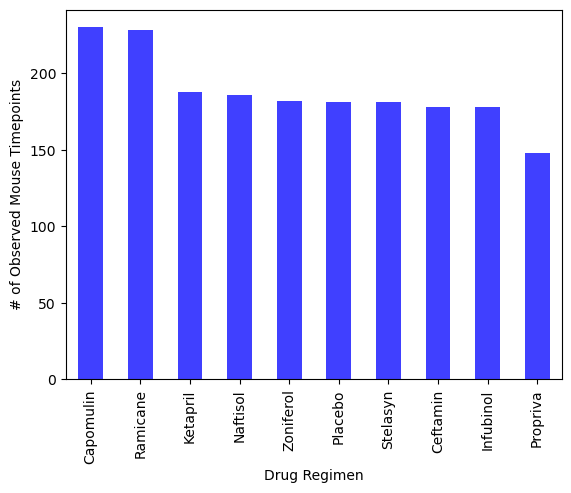

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_groups_pd = cleaned_mouse_data_df.groupby("Drug Regimen").count()
regimen_groups_pd = regimen_groups_pd.sort_values(by="Mouse ID", ascending=False)
regimen_groups_pd.plot(kind='bar', color = 'blue', alpha=0.75, align = 'center', legend=None, 
                               xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

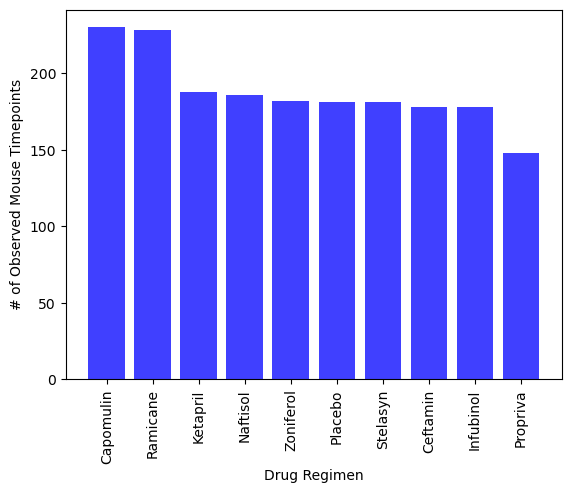

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_groups_py = cleaned_mouse_data_df.groupby("Drug Regimen").size()
reg_group_sort_py = regimen_groups_py.sort_values(ascending=False)
drug_regimen_py = reg_group_sort_py.index
count = reg_group_sort_py.values
plt.bar(drug_regimen_py, count, color='blue', alpha=0.75, align='center')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()

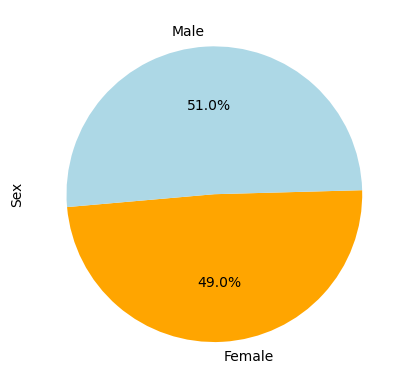

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist_pd = cleaned_mouse_data_df.groupby(["Sex"]).size()
sex_dist_pd.plot(kind='pie',autopct='%1.1f%%',colors=['orange', 'lightblue'], startangle=185, ylabel="Sex")
plt.show()

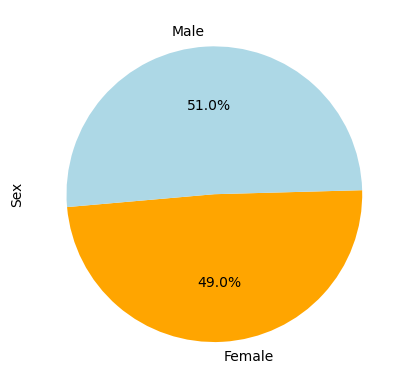

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist_py = cleaned_mouse_data_df.groupby(["Sex"]).size()
plt.pie(sex_dist_py,autopct='%1.1f%%',colors=['orange', 'lightblue'], startangle=185,labels=sex_dist_py.index)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = cleaned_mouse_data_df.groupby("Mouse ID")["Timepoint"].max()
#last_timepoint_per_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumorvolume_df = pd.merge(cleaned_mouse_data_df, last_timepoint_per_mouse, on=["Mouse ID", "Timepoint"])
#final_tumorvolume_df

In [42]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in drug_treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumorvolume_df[final_tumorvolume_df["Drug Regimen"] == regimen]
    
    # add subset 
    tumor_volumes = treatment_data["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)
   
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = treatment_data[(treatment_data["Tumor Volume (mm3)"] < lower_bound) |
                                            (treatment_data["Tumor Volume (mm3)"] > upper_bound)] ["Tumor Volume (mm3)"]
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


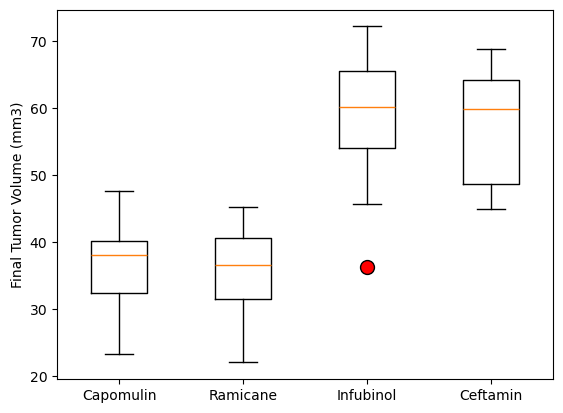

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
ax1.set_xticklabels(drug_treatment_regimens)
plt.show()

## Line and Scatter Plots

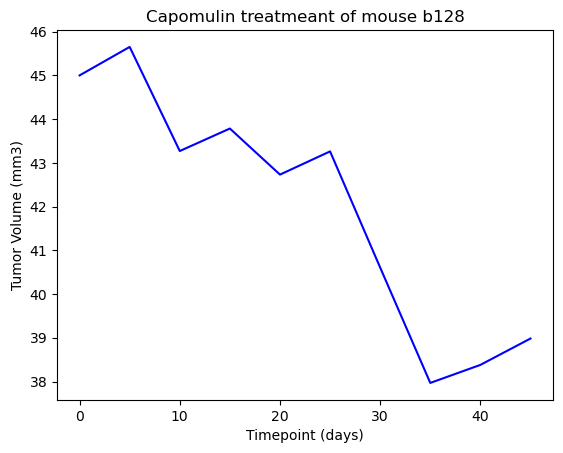

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_mouse_data_df[cleaned_mouse_data_df["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data["Mouse ID"].iloc[0]
one_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

plt.plot(one_mouse_data["Timepoint"], one_mouse_data["Tumor Volume (mm3)"], color='blue', linestyle='-')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatmeant of mouse {mouse_id}")
plt.show()

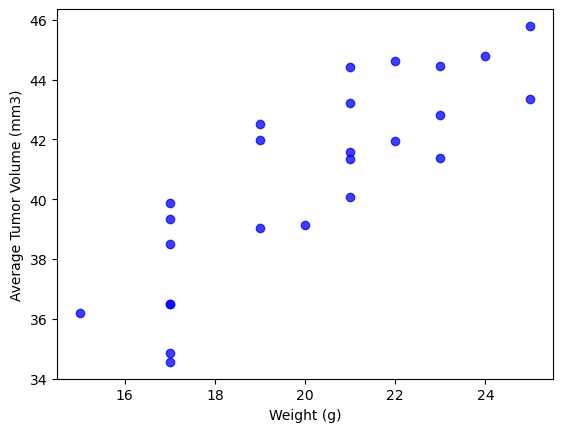

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_data_df[cleaned_mouse_data_df["Drug Regimen"] == "Capomulin"]
#capomulin_data
capomulin_tumor_size = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weights, capomulin_tumor_size, facecolors="blue", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


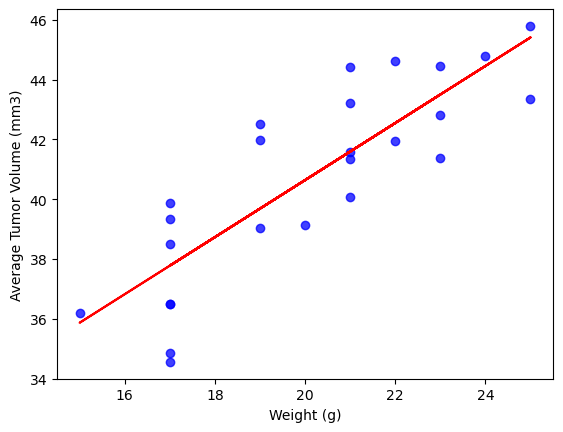

In [46]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(capomulin_tumor_size,mouse_weights)[0],2)}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, capomulin_tumor_size)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(mouse_weights, capomulin_tumor_size, facecolors="blue", alpha=0.75)
plt.plot(mouse_weights, slope * mouse_weights+intercept, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()